# Churn Prediction for Banking Customers

>Ming Zhao
<br>
>October 10, 2021

In this project, I use supervised learning models to identify customers who are likely to churn in the future ans analyze the top factors that influence customer retention.

Data information can be found below: https://www.kaggle.com/adammaus/predicting-churn-for-bank-customers

### Contents

-   Data Exploration

-   Feature Preprocessing

-   Model Training and Results Evaluation
    1. Dataset Splitting
    2. Model Training and Selection
        - **Logistic Regression**
        - **KNN**
        - **Random Forest**     
        - Cross Validation
    3. Grid Search for Optimal Hyperparameters
    4. Model Evaluation
        - Confusion Matrix (Precision, Recall, Accuracy)
        - ROC & AUC
-   Feature Selction
    1. Feature Selection Discussion - Logistic Regression
    2. Feature Importance Discussion - Random Forest
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.feature_selection import SelectFromModel


## Data Exploration

In [2]:
# Load data into dataframe
churn_df = pd.read_csv('Churn_Modelling.csv')

In [3]:
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# Check data info
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# Check the unique values for each column
churn_df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [6]:
# Get the interested variable
y = churn_df['Exited']

In [7]:
# Check the value counts of y
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
# Check the propotion of y = 1
print(y.sum() / y.shape[0] * 100)
#print(y.mean()*100) # for binary variables

20.369999999999997


In [9]:
# check missing values
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
# Understand numerical/continuous features
churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts','Balance', 'EstimatedSalary']].describe()

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,1.530200,76485.889288,100090.239881
std,96.653299,10.487806,2.892174,0.581654,62397.405202,57510.492818
min,350.000000,18.000000,0.000000,1.000000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,1.000000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,1.000000,97198.540000,100193.915000
75%,718.000000,44.000000,7.000000,2.000000,127644.240000,149388.247500
max,850.000000,92.000000,10.000000,4.000000,250898.090000,199992.480000


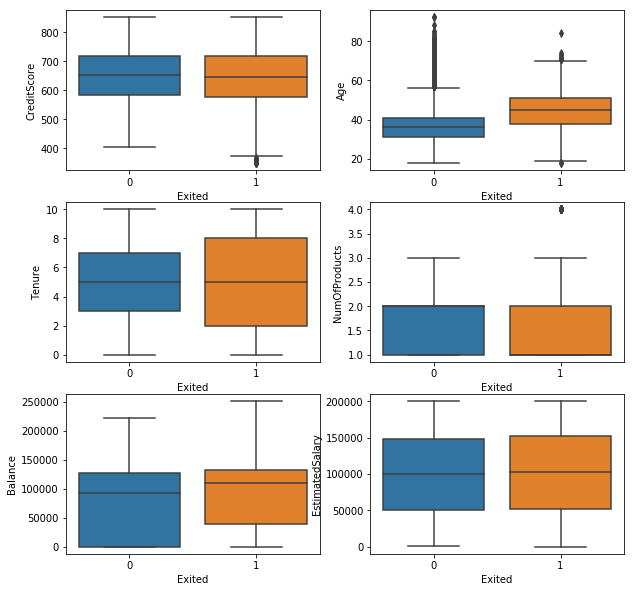

In [11]:
# boxplot for numerical feature
_,axss = plt.subplots(3,2, figsize=[10,10])
sns.boxplot(x='Exited', y ='CreditScore', data=churn_df, ax=axss[0][0])
sns.boxplot(x='Exited', y ='Age', data=churn_df, ax=axss[0][1])
sns.boxplot(x='Exited', y ='Tenure', data=churn_df, ax=axss[1][0])
sns.boxplot(x='Exited', y ='NumOfProducts', data=churn_df, ax=axss[1][1])
sns.boxplot(x='Exited', y ='Balance', data=churn_df, ax=axss[2][0])
sns.boxplot(x='Exited', y ='EstimatedSalary', data=churn_df, ax=axss[2][1])

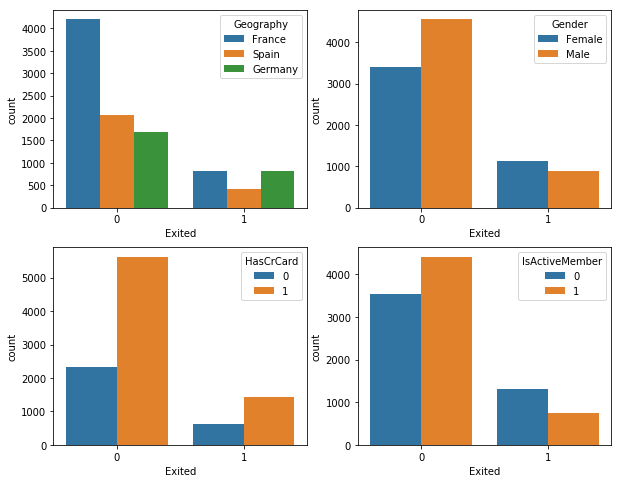

In [12]:
# understand categorical features
_,axss = plt.subplots(2,2, figsize=[10,8])
sns.countplot(x='Exited', hue='Geography', data=churn_df, ax=axss[0][0])
sns.countplot(x='Exited', hue='Gender', data=churn_df, ax=axss[0][1])
sns.countplot(x='Exited', hue='HasCrCard', data=churn_df, ax=axss[1][0])
sns.countplot(x='Exited', hue='IsActiveMember', data=churn_df, ax=axss[1][1])

In [13]:
# correlations between features
corr_score = churn_df[['CreditScore', 'Age', 'Tenure', 'NumOfProducts',
                       'Balance', 'EstimatedSalary']].corr()

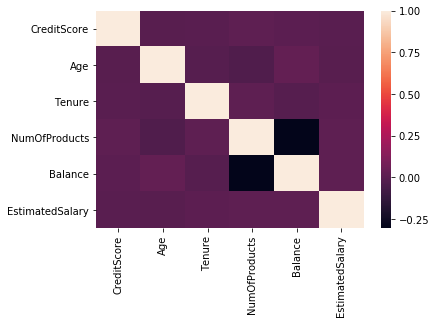

In [14]:
# show heapmap of correlations
sns.heatmap(corr_score)

In [15]:
# check the actual values of correlations
corr_score

,CreditScore,Age,Tenure,NumOfProducts,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.012238,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,-0.030680,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,0.013444,-0.012254,0.007784
NumOfProducts,0.012238,-0.030680,0.013444,1.000000,-0.304180,0.014204
Balance,0.006268,0.028308,-0.012254,-0.304180,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.014204,0.012797,1.000000


## Feature Preprocessing

In [16]:
churn_df.shape

(10000, 14)

In [17]:
# Ordinal encoding: each unique category is assigned an integer value
churn_df['Gender'] = np.where(churn_df['Gender']=='Female', 1, 0)

In [18]:
# One-hot encoding: it creates one binary variable for each category
churn_df = pd.get_dummies(churn_df, columns=['Geography'])

In [19]:
# Drop useless columns
to_drop = ['RowNumber','CustomerId','Surname','Exited']
X = churn_df.drop(to_drop, axis=1)

In [20]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,1


## Model Training and Result Evaluation

### Dataset Splitting

In [21]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, 
                                                          stratify = y, random_state=1)
#reserve 25% for testing
#random_state ensures that the splits are reproducible
#stratify example:
    # 10000 -> y: 8000 '0', 2000 '1' -> 4:1
    # 75% training 6000: '0', 1500:'1' -> 4:1
    # 25% testing  2000:'0', 500: '1' -> 4:1

print('training data has ' + str(X_train.shape[0]) + ' observations with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observations with ' + str(X_test.shape[1]) + ' features')

training data has 7500 observations with 12 features
test data has 2500 observations with 12 features


In [22]:
# standardization (x-mean)/std
# normalization (x-x_min)/(x_max-x_min) ->[0,1]

In [23]:
# Scale the data, use standardization
    # 1. speed up gradient descent
    # 2. same scale
    # 3. algorithm requirments
    
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

# scaler.fit() calculates the parameters and saves them as an internal object's state. 
# Then, call "transform" to apply the transformation to any particular set of examples.

# Use training data to train the standardscaler to get mean and std 
# apply mean and std to both training and testing data.
# "fit_transform" does the training and applying, "transform" only does applying
# Because we can't use any info from test, and we need to do the same modification
# to testing data as well as training data

### Model Training and Selection

#### Logistic Regression

It uses the logit function (i.e. sigmoid function) to limit prediction values within [0,1], and uses maximum likelihood estimation to calculate loss function.

In [24]:
# Logistic Regression
classifier_logistic = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs') #default='l2', default=1.0, default='lbfgs'

In [25]:
# Train the model
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [26]:
# Prediction of test data
lr_y_pred = classifier_logistic.predict(X_test)
lr_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
# Predicted probability
classifier_logistic.predict_proba(X_test)[:,1] 

array([0.17530061, 0.06779584, 0.14485181, ..., 0.28574135, 0.10678208,
       0.14431363])

In [28]:
# Accuracy & MSE of test data
logit_accuracy = classifier_logistic.score(X_test, y_test)
logit_mse = mean_squared_error(y_test, lr_y_pred)

print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logit_accuracy))
print('MSE of logistic regression classifier on test set: {:.3f}'.format(logit_mse))

Accuracy of logistic regression classifier on test set: 0.808
MSE of logistic regression classifier on test set: 0.192


#### KNN

It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

In [29]:
# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier(n_neighbors=5, metric='minkowski') #default=5, default='minkowski' [defined by sum(|x - y|^p)^(1/p)]

In [30]:
# Train the model
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
# Prediction of test data
knn_y_pred = classifier_KNN.predict(X_test)
knn_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
# Predicted probability
classifier_KNN.predict_proba(X_test)[:,1] 

array([0. , 0. , 0.2, ..., 0.2, 0. , 0. ])

In [33]:
# Accuracy & MSE of test data
knn_accuracy = classifier_KNN.score(X_test, y_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)

print('Accuracy of KNN classifier on test set: {:.3f}'.format(knn_accuracy))
print('MSE of KNN classifier on test set: {:.3f}'.format(knn_mse))

Accuracy of KNN classifier on test set: 0.827
MSE of KNN classifier on test set: 0.173


#### Random Forest

Random Rorest is an ensemble learning method, specifically, it is a classification algorithm consisting of decisions trees and using bagging. Bagging is bootstrapping (sampling with replacement) plus aggregation; the advantage of bagging method is decreasing variance by introducing randomness into model framework.

How does the algorithm work?

It works in five steps:

1. Select random samples from a given training set which contains m features.
2. Construct a decision tree with k features for each sample, where usually $k=\sqrt{m}$.
3. Use the test set to get a prediction result from each decision tree.
4. Perform a vote for each predicted result.
5. Select the prediction result with the most votes as the final prediction.

In [34]:
# Random Forest
classifier_RF = RandomForestClassifier(n_estimators=100) #default=100

In [35]:
# Train the model
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [36]:
# Prediction of test data
rf_y_pred = classifier_RF.predict(X_test)
rf_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
# Predicted probability
classifier_RF.predict_proba(X_test)[:,1]

array([0.23, 0.05, 0.29, ..., 0.16, 0.04, 0.09])

In [38]:
# Accuracy & MSE of test data
rf_accuracy = classifier_RF.score(X_test, y_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)

print('Accuracy of RF classifier on test set: {:.3f}'.format(rf_accuracy))
print('MSE of RF classifier on test set: {:.3f}'.format(rf_mse))

Accuracy of RF classifier on test set: 0.861
MSE of RF classifier on test set: 0.139


#### 5-fold Cross Validation

cross validation -> model selection

validation and training together -> parameters

In [39]:
# Use 5-fold Cross Validation
model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]

In [40]:
# Accuracy for different models
count = 0
for classifier in model_list:
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score.round(3))
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean().round(3)))
    count += 1

[0.819 0.807 0.807 0.809 0.82 ]
Model accuracy of Logistic Regression is 0.812
[0.825 0.836 0.814 0.824 0.832]
Model accuracy of KNN is 0.826
[0.873 0.866 0.859 0.861 0.866]
Model accuracy of Random Forest is 0.865


In [41]:
# MSE for different models
count = 0
for classifier in model_list:
    cv_score = cross_val_score(classifier, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    print(abs(cv_score.round(3)))
    print('Final MSE of ' + model_names[count] + ' is ' + str(abs(cv_score.mean().round(3))))
    count += 1

[0.181 0.193 0.193 0.191 0.18 ]
Final MSE of Logistic Regression is 0.188
[0.175 0.164 0.186 0.176 0.168]
Final MSE of KNN is 0.174
[0.126 0.138 0.143 0.144 0.138]
Final MSE of Random Forest is 0.138


### Grid Search for Optimal Hyperparameters

In [42]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))

*

In [43]:
# Possible hyperparamter options for Logistic Regression Regularization
# Penalty is choosed from L1 or L2

  ## Regulation is nothing but adding a penalty term to the loss function and 
  ## controlling the model complexity using that penalty term

     ### L1: LASSO Regression [penalty term involves the absolute]
     ### L2: Ridge Regression [penalty term involves the squared]
    
# C is the lambda (weight) for L1 and L2; lambda is the hyperparameter 

# ('l1', 1) ('l1', 5) ('l1', 10) ('l2', 1) ('l2', 5) ('l2', 10)
parameters = {
    'penalty':('l1', 'l2'), 
    'C':(1, 5, 10)
}
Grid_LR = GridSearchCV(LogisticRegression(solver='liblinear'),parameters, cv=5)

Grid_LR.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (1, 5, 10), 'penalty': ('l1', 'l2')})

In [44]:
# best hyperparameter combination
# C = 1/lambda
print_grid_search_metrics(Grid_LR)

Best score: 0.8124
Best parameters set:
C:1
penalty:l2


In [45]:
best_LR_model = Grid_LR.best_estimator_

*

In [46]:
# Possible hyperparamter options for KNN
# Choose k
parameters = {
    'n_neighbors':[1,3,5,7,9]
}
Grid_KNN = GridSearchCV(KNeighborsClassifier(),parameters, cv=5)

Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9]})

In [47]:
# best k
print_grid_search_metrics(Grid_KNN)

Best score: 0.8322666666666667
Best parameters set:
n_neighbors:9


In [48]:
best_KNN_model = Grid_KNN.best_estimator_

*

In [49]:
# Possible hyperparamter options for Random Forest
# Choose the number of trees
parameters = {
    'n_estimators' : [40,60,80]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)

Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [40, 60, 80]})

In [50]:
# best number of trees
print_grid_search_metrics(Grid_RF)

Best score: 0.8648
Best parameters set:
n_estimators:80


In [51]:
# best random forest
best_RF_model = Grid_RF.best_estimator_

### Model Evaluation

#### Confusion Matrix  (Precision, Recall, Accuracy)

In [52]:
# TN: True negative
# FP: False positive
# FN: False negative
# TP: True positive

#                  Predicted Values
#                     0        1
#                0   TN       FP
# Actual Values
#                1   FN       TP

# Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)

# Precision measures how good the model is when the prediction is positive
# e.g. Considering precision, among all positive predicted events, {} were right

# Recall measures how good the model is at correctly predicting positive classes
# e.g. Considering recall, among all positive actual events, {} of them are predicted correctly

# Accuracy = (TP + TN) / (TP + FP + FN + TP)

def cal_evaluation(classifier, conf_matrix):
    tn = conf_matrix[0][0]
    fp = conf_matrix[0][1]
    fn = conf_matrix[1][0]
    tp = conf_matrix[1][1]
    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)
    precision = tp / (tp + fp + 0.0)
    recall = tp / (tp + fn + 0.0)
    print ()
    print (classifier)
    print ("Accuracy is: " + str(accuracy.round(3)))
    print ("precision is: " + str(precision.round(3)))
    print ("recall is: " + str(recall.round(3)))

In [53]:
confusion_matrices = [
    ("Logistic Regression", confusion_matrix(y_test,best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test))),
    ("Random Forest", confusion_matrix(y_test,best_RF_model.predict(X_test)))
]

for element in confusion_matrices:
    classifier, conf_matrix = element[0], element[1]
    cal_evaluation(classifier, conf_matrix)


Logistic Regression
Accuracy is: 0.808
precision is: 0.586
recall is: 0.194

K nearest neighbor
Accuracy is: 0.834
precision is: 0.684
recall is: 0.34

Random Forest
Accuracy is: 0.86
precision is: 0.767
recall is: 0.452


##### ROC & AUC

**ROC:** A good classifier stays as far away from the red line as possible toward the top-left corner, so the best case stands on (0, 1), while the worst case is on (1, 0).

**AUC:** It measures how false positive rate (FPR) and true positive rate (TPR) trade off. The larger the value is, the better the classification performance is. 

- when AUC = 1, the classifier is able to perfectly distinguish between all the positives and negatives correctly. (100% of predictions are correct.)

- when 0.5 < AUC < 1, there is a high chance that the classifier is able to distinguish. the positives and negatives.

- When AUC = 0.5, the classifier is not able to distinguish between the positives and negatives. (It is a random chance.)

Note:

$TPR = \frac{\# \space TP}{\# \space real \space positive}$

$FPR = \frac{\# \space FP}{\# \space real \space negative} = 1 - TPR$

$TPR = FPR$ -> equal error rate

*

In [54]:
lr_y_pred = best_LR_model.predict(X_test)
lr_y_pred_prob = best_LR_model.predict_proba(X_test)[:,1] 

lr_roc_auc = roc_auc_score(y_test, lr_y_pred)
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y_test, lr_y_pred_prob)

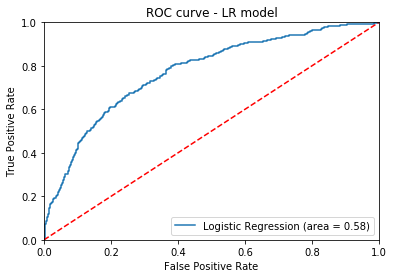

In [55]:
# ROC Curve
plt.figure()
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - LR model')
plt.legend(loc="lower right")
plt.show()

In [56]:
# AUC score
auc(lr_fpr, lr_tpr)

0.7722314264879581

*

In [57]:
knn_y_pred = best_KNN_model.predict(X_test)
knn_y_pred_prob = best_KNN_model.predict_proba(X_test)[:,1] 

knn_roc_auc = roc_auc_score(y_test, knn_y_pred)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_y_pred_prob)

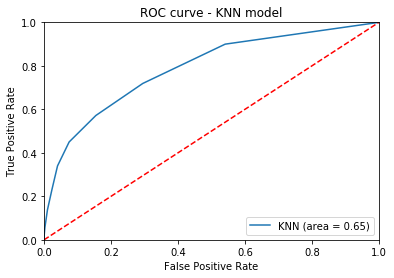

In [58]:
# ROC Curve
plt.figure()
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - KNN model')
plt.legend(loc="lower right")
plt.show()

In [59]:
# AUC score
auc(knn_fpr, knn_tpr)

0.7882519471215756

*

In [60]:
rf_y_pred = best_RF_model.predict(X_test)
rf_y_pred_prob = best_RF_model.predict_proba(X_test)[:,1] 

rf_roc_auc = roc_auc_score(y_test, rf_y_pred)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf_y_pred_prob)

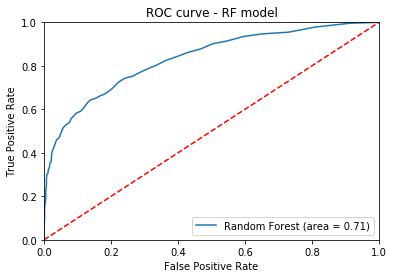

In [61]:
# ROC Curve
plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - RF model')
plt.legend(loc="lower right")
plt.show()

In [62]:
# AUC score
auc(rf_fpr, rf_tpr)

0.8335678529808499

## Feature Selction

### Feature Selection Discussion - Logistic Regression

**L1 (Lasso)** tends to provide sparse results, which is a method for feature selection. However, it does not work for the situation when involving correlation between features due to its sparse results. In addition, the results L1 gives are not stable. Therefore, we rarely use L1.

**L2 (Ridge)** tends to provide stable results and is able to deal with feature correlation. For correlated features, they tend to get similar coefficients in L2 model. In contrast to L1, it **cannot be used for feature selection**.

https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/#three

**Lasso:** 

Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the number of features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.

It arbitrarily selects any one feature among the highly correlated ones and reduced the coefficients of the rest to zero. Also, the chosen variable changes randomly with change in model parameters. This generally doesn’t work that well as compared to ridge regression.


**Ridge:** 

It is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of exorbitantly high number of features, say in millions, as it will pose computational challenges.

It generally works well even in presence of highly correlated features as it will include all of them in the model but the coefficients will be distributed among them depending on the correlation.


In [63]:
X_with_corr = X.copy()
X_with_corr['SalaryInRMB'] = X['EstimatedSalary'] * 6.91

In [64]:
# add L1 regularization to logistic regression
# check the coefficients for feature selection

scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 0.07, solver='liblinear', random_state=1)
LRmodel_l1.fit(X_l1, y)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
Age : 0.744
IsActiveMember : -0.5184
Geography_Germany : 0.3156
Gender : 0.2503
Balance : 0.1566
CreditScore : -0.0537
NumOfProducts : -0.0503
Tenure : -0.0351
EstimatedSalary : 0.0106
Geography_France : -0.01
HasCrCard : -0.0099
SalaryInRMB : 0.0064
Geography_Spain : 0.0


In [65]:
# add L2 regularization to logistic regression
# check the coef for feature selection
np.random.seed()
scaler = StandardScaler()
X_l2 = scaler.fit_transform(X_with_corr)
LRmodel_l2 = LogisticRegression(penalty="l2", C = 0.09, solver='liblinear', random_state=1)
LRmodel_l2.fit(X_l2, y)

indices = np.argsort(abs(LRmodel_l2.coef_[0]))[::-1]

print ("Logistic Regression (L2) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l2.coef_[0][indices[ind]], 4)))

Logistic Regression (L2) Coefficients
Age : 0.7497
IsActiveMember : -0.5261
Gender : 0.2587
Geography_Germany : 0.2276
Balance : 0.1617
Geography_France : -0.1206
Geography_Spain : -0.0889
CreditScore : -0.0636
NumOfProducts : -0.0585
Tenure : -0.0451
HasCrCard : -0.0199
SalaryInRMB : 0.0137
EstimatedSalary : 0.0137


### Feature Importance Discussion - Random Forest

**Mean Decrease Impurity** (or Gini Importance)

https://blog.methodsconsultants.com/posts/be-aware-of-bias-in-rf-variable-importance-metrics/


In [66]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(X, y)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(X.shape[1]):
  print ("{0} : {1}".format(X.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
Age : 0.2392
EstimatedSalary : 0.1444
CreditScore : 0.1444
Balance : 0.1443
NumOfProducts : 0.1276
Tenure : 0.0831
IsActiveMember : 0.0416
Geography_Germany : 0.0206
Gender : 0.0183
HasCrCard : 0.018
Geography_France : 0.0102
Geography_Spain : 0.0085


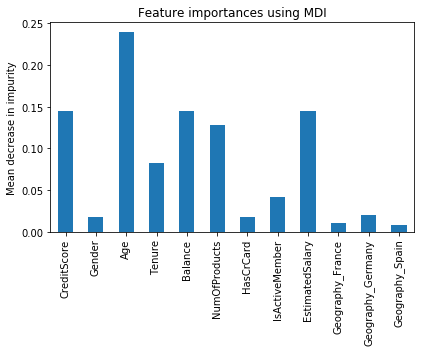

In [67]:
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots(figsize=(6,5))
forest_importances.plot.bar()
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [68]:
sel = SelectFromModel(RandomForestClassifier())
sel.fit(X, y)

selected_feat= X.columns[(sel.get_support())]
selected_feat

Index(['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary'], dtype='object')

<br>

<br>